In [1]:
import pandas as pd
import pylab
import sklearn as sk
%pylab inline

df = pd.read_csv('./data/card_transdata.csv')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from ydata_profiling import ProfileReport

#ydata_profiling for feature leak detection
profile = ProfileReport(
        df, 
        title="Data Profiling Report", 
        explorative=True, 
        correlations = {
        "pearson": {"calculate": True},
    },)

profile.to_file("card_transdata_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#separate "fraud" column (class label)
X = df.drop("fraud", axis=1)
y = df["fraud"]

#split the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

#train DecisionTreeClassifier model
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

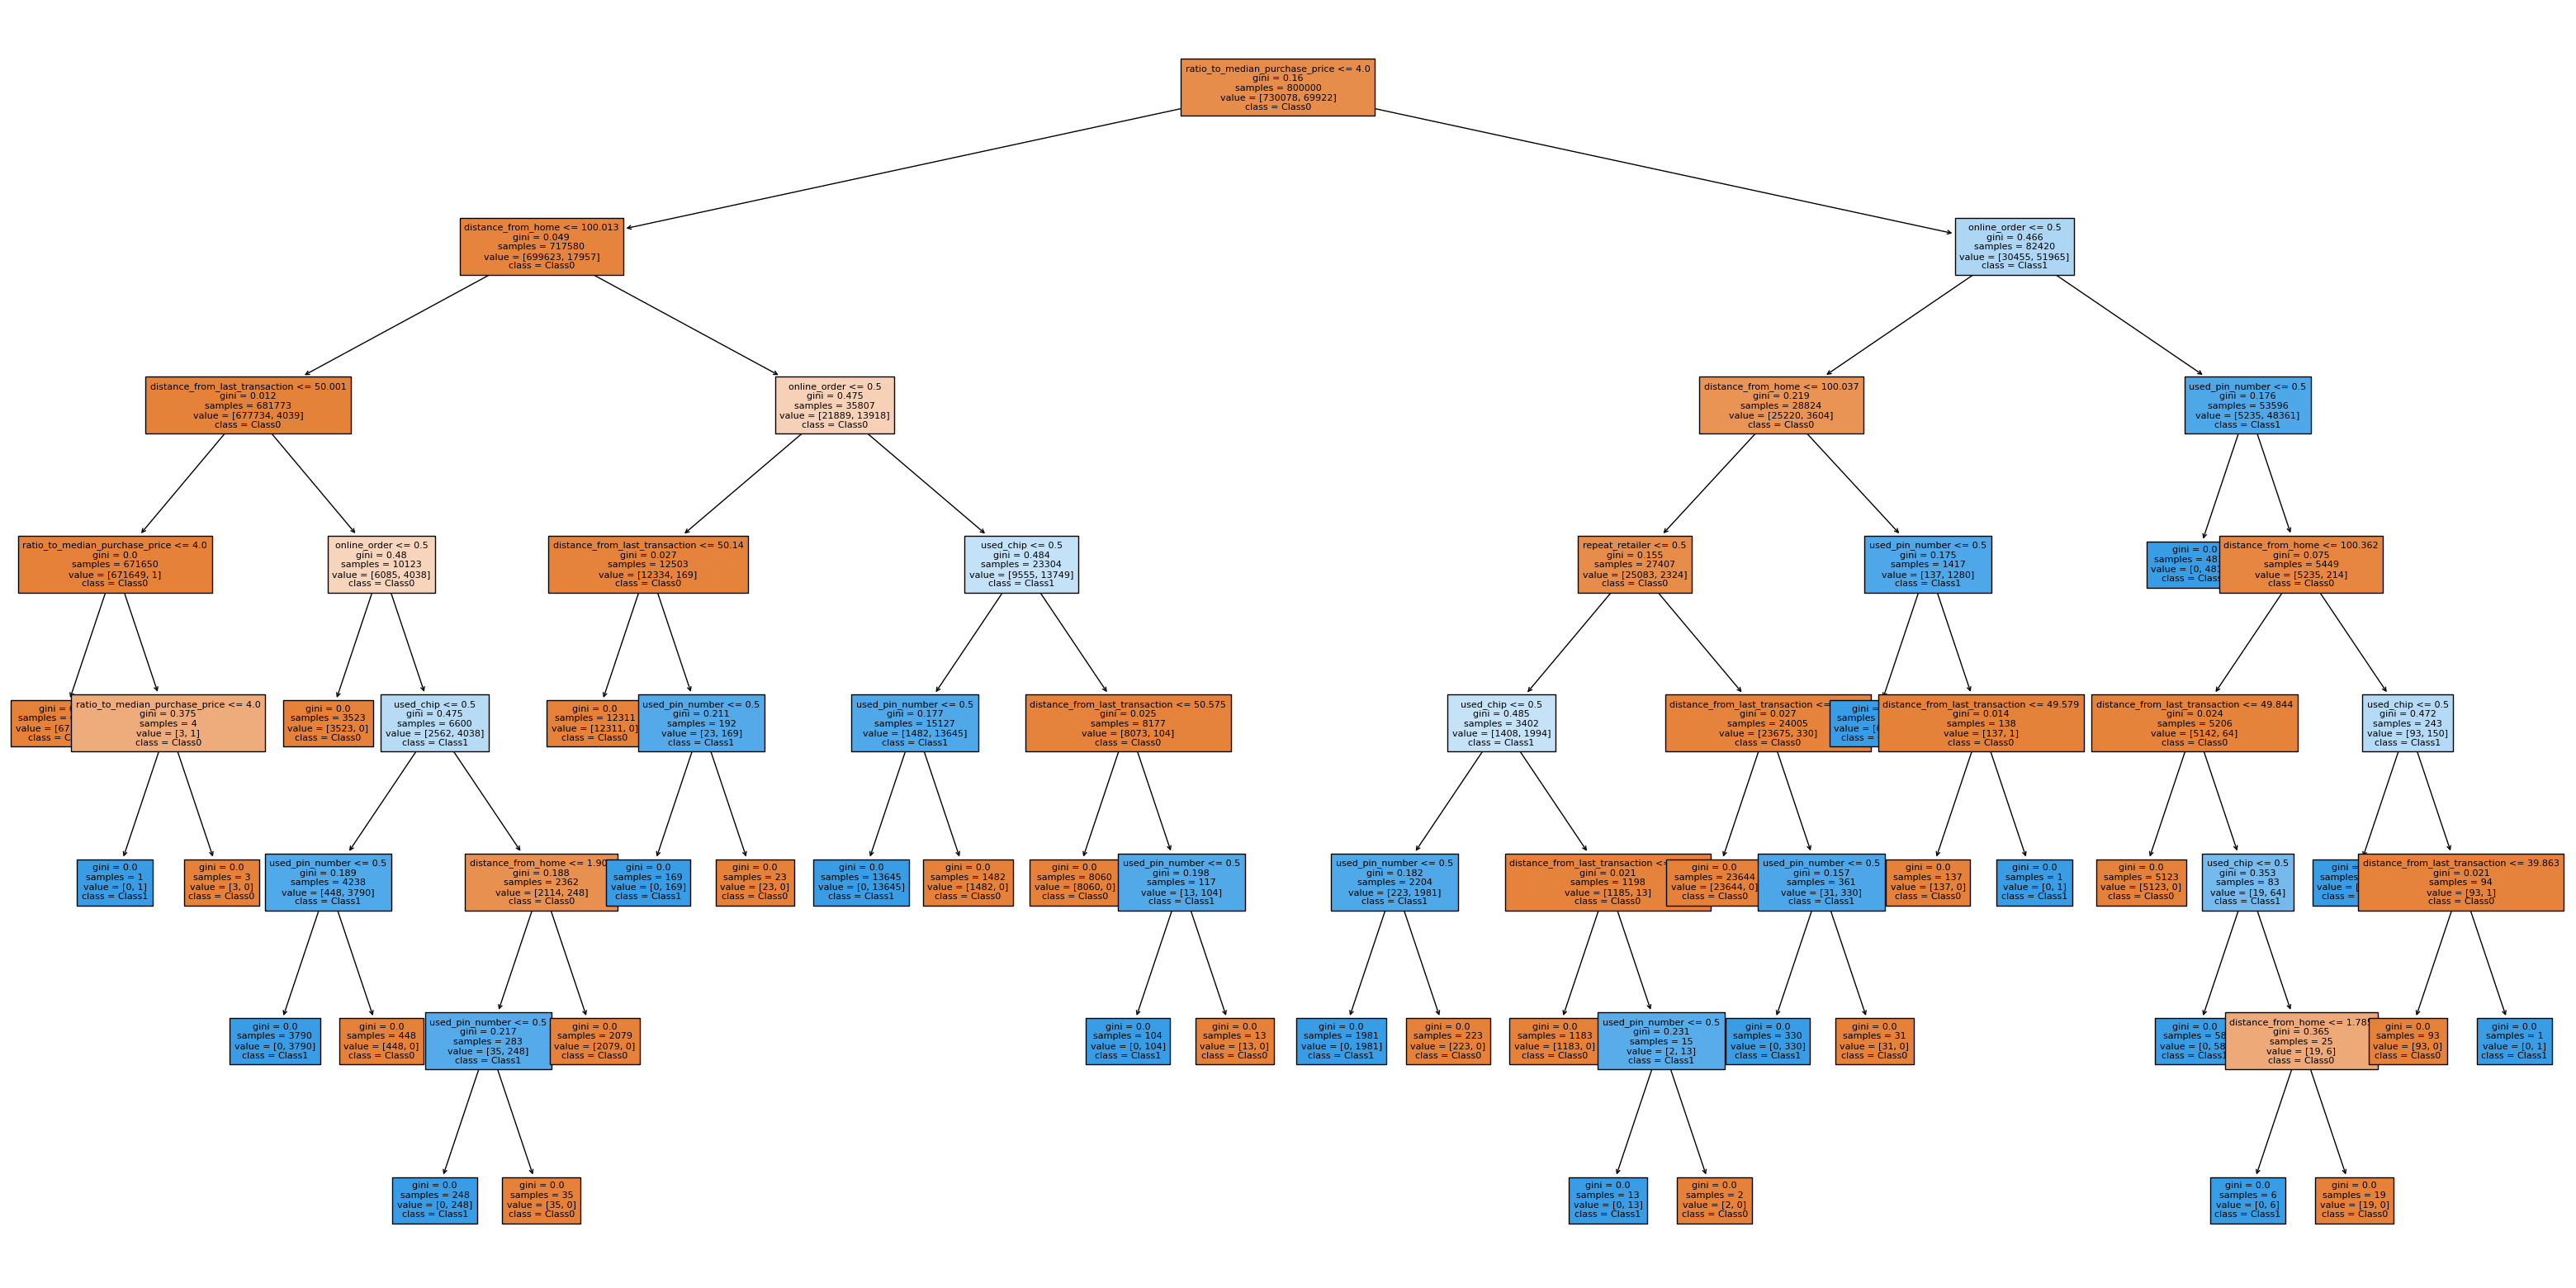

In [12]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(dt_model, feature_names=df.columns[:-1], class_names=['Class0','Class1'], filled=True, fontsize=8)
plt.show()

In [22]:
#check for data leackage for categorical features:

#categorical features
categorical = ['repeat_retailer', 'used_chip', 'used_pin_number', 'used_pin_number']
numeric = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
print("single feature")

for col in numeric:
    bins = pd.cut(df[col], bins=10)
    nunique_per_bin = df.groupby(bins)['fraud'].nunique()
    print(col, nunique_per_bin)

#check any feature contains only 1 class label for (fruad=0 or fruad=1) 
for col in categorical:
    print(col, df.groupby(col)['fraud'].nunique())


print("2 features")
#check any combination of 2 features contains only 1 class label for (fruad=0 or fruad=1) 
for col1 in categorical:
    for col2 in categorical:
        # Make a group by both
        print(df.groupby([col1, col2])['fraud'].nunique())

single feature
distance_from_home distance_from_home
(-10.628, 1063.277]      2
(1063.277, 2126.549]     2
(2126.549, 3189.821]     2
(3189.821, 4253.092]     2
(4253.092, 5316.364]     2
(5316.364, 6379.636]     1
(6379.636, 7442.908]     0
(7442.908, 8506.18]      0
(8506.18, 9569.452]      1
(9569.452, 10632.724]    1
Name: fraud, dtype: int64
distance_from_last_transaction distance_from_last_transaction
(-11.851, 1185.111]       2
(1185.111, 2370.221]      2
(2370.221, 3555.331]      1
(3555.331, 4740.442]      0
(4740.442, 5925.552]      1
(5925.552, 7110.663]      0
(7110.663, 8295.773]      0
(8295.773, 9480.884]      0
(9480.884, 10665.994]     0
(10665.994, 11851.105]    1
Name: fraud, dtype: int64
ratio_to_median_purchase_price ratio_to_median_purchase_price
(-0.263, 26.784]      2
(26.784, 53.564]      2
(53.564, 80.344]      2
(80.344, 107.124]     2
(107.124, 133.904]    1
(133.904, 160.684]    1
(160.684, 187.463]    1
(187.463, 214.243]    0
(214.243, 241.023]    0
(241.